## Problem Set 4 - Locality Sensitive Hashing

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8111)
html

## <font style="color: red"> Esta práctica contiene 5 ejercicios obligatorios <!-- ONLY IN NOTEBOOK -->


### Ejercicio 1: Proyección de un punto y obtención de su bin

Dos dos vectores $p_t$ y $p_r$ la proyección de $p_t$ sobre $p_r$ viene dada por:

$$p=p_r\frac{p_t \bullet p_r}{||p_r||^2}$$

y el bin en el que cae dicha proyección:

$$ bin(p_r, p_t, bw) = sign(p[0])*floor\Bigg(\frac{||p||}{bw}+1\Bigg)$$

donde:
- $\bullet$ es el producto punto
- $||x||$ es la norma $L_2$ del vector $x$ (es decir, su longitud)
- $sign(x)$ es $+1$ si $x\ge 0$ y $-1$ en otro caso (ojo, la función `np.sign` no tiene exactamente esta semántica)
- $p[0]$ es el primer componente del vector $p$
- $bw$ es el ancho del bin que queremos usar

observa que la expresión $p_t \bullet p_r/||p_r||^2$ es un escalar.

Completa la función `get_bin` para que, dado un vector de proyección, un punto y un tamaño de bin, devuelva el bin en el que cae el punto proyectado. El valor devuelto **ha de ser un entero** (`int`) .

** Ejecución esperada **

    > get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.1)
    > 5
    
    > get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.2)
    > 3
    
    > get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.01)
    > 41
    
    > get_bin(np.array([-0.5,-2,4]), np.array([.1,-.2,.6]), .05)
    > -13

In [ ]:
import numpy as np
def get_bin(pr, pt, bw):
    # TU CODIGO AQUI
    result = 0
    return result

Comprueba tu código

In [ ]:
print get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.1)
print get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.2)
print get_bin(np.array([0.5,1.]), np.array([.1,.4]), 0.01)
print get_bin(np.array([-0.5,-2,4]), np.array([.1,-.2,.6]), .05)

### Ejercicio 2: Construcción de la estructura de buckets

Usaremos una estructura con una lista de diccionarios para llevar la cuenta de qué datos contiene cada bin cuando tenemos varias proyecciones. Por ejemplo:

    bucket[2][3] = [192, 3, 9034, 23]
   
indica que en el bin 3 de la proyección número 2 caen los datos cuyos índices son el 192, 3, 9034 y 23.

Completa la función `build_buckets(projections, data, bin_width)` para que dado un conjunto de projecciones $\in \mathbb{R}^{t \times n}$ y un conjunto de datos $\in \mathbb{R}^{m \times n}$ nos devuelva una estructura como la del ejemplo. Es decir, tenemos $t$ proyecciones y $m$ datos, en ambos casos de $n$ dimensiones. 

** Ejecución esperada **

    > data = np.array(
       [[ 0.016,  0.331],
        [ 0.813,  0.743],
        [ 0.777,  0.897],
        [ 0.986,  0.754],
        [ 0.793,  0.142],
        [ 0.868,  0.655],
        [ 0.285,  0.393],
        [ 0.220,  0.269],
        [ 1.874,  1.864],
        [ 0.206,  0.579]])  
    > projs = np.array([[0,1],[1,1]])
    > b     = build_buckets(projs, data, 0.1)
    > print b
    > [{2: [4], 3: [7], 4: [0, 6], 6: [9], 7: [5], 8: [1, 3], 9: [2], 19: [8]}, 
       {3: [0], 4: [7], 5: [6], 6: [9], 7: [4], 11: [5], 12: [1, 2], 13: [3], 27: [8]}]
       
    > print get_signature(projs, data[0], 0.1)
    > [4, 3]

Fíjate que 

- el resultado es una **lista de diccionarios**
- con `b[0]` accedemos al diccionario de la primera proyección, con `b[1]` a la segunda, etc.
- cada diccionario tiene como _keys_ a los bins de esa proyección
- con `b[0][8]` accedemos al bin 8 de la primera proyección (que tiene los elementos 1 y 3) **pero** el `0` es el índice de una lista y el `8` es la llave de un diccionario, aunque la notación es la misma.
- la razón por la que usamos diccionarios es que no todos los bins de cada proyección van a tener necesariamente datos.
- en el ejemplo anterior, la primera proyección `[0, 1]`, sólo usa la segunda coordenada de los datos, con lo que se puede ver la relación entre el valor de la segunda coordanada de cada dato y el bin en el que cae en la primera proyección.

_Sugerencia_: usa la función `get_signature` para, dado un punto y un conjunto de proyecciones, obtener los bins en los que dicho punto cae en cada una de las proyecciones.

In [ ]:
import numpy as np

def get_signature(projections, point, bin_width):
    return [get_bin(p,point,bin_width) for p in projections]

def build_buckets(projections, data, bin_width):
    # inicialización de la estructura buckets
    nb_projections = len(projections)
    buckets     = [{} for i in range(nb_projections)]

    # TU CODIGO AQUI
    return buckets

Comprueba tu código.

In [ ]:
data = np.array(
[[ 0.016,  0.331],
 [ 0.813,  0.743],
 [ 0.777,  0.897],
 [ 0.986,  0.754],
 [ 0.793,  0.142],
 [ 0.868,  0.655],
 [ 0.285,  0.393],
 [ 0.220,  0.269],
 [ 1.874,  1.864],
 [ 0.206,  0.579]]
)  
projs = np.array([[0,1],[1,1]])

print "signature", get_signature(projs, data[0], 0.1)
print "--"
print "buckets:"
print build_buckets(projs, data, 0.1)
    


### Ejercicio 3: Search OR

Dado un punto de query $q \in \mathbb{R}^n$ y la estructura de datos anteriormente creada, completa la función `searchOR` para que:

1. Calcule el bin en el que cae $q$ en cada una de las proyecciones
1. Recupere de la estructura `bucket` los ids de los datos que están en **al menos** una de los bins en los que cayó $q$ en cada proyeccion. Estos datos son los _candidatos_
1. Mida la distancia de cada candidato a $q$ y devuelva los $k$ que estén más cercanos. Si `k==None` entonces deberá de devolver **TODOS** los candidatos. No utilices `np.sort` para este paso, haz una única pasada por los _candidatos_ para recuperar los $k$ más cercanos.

**Ejecución esperada**

Con `data` definida como en el ejercicio anterior

    > projs   = np.array([[0,1],[1,1]])
    > bw      = 0.3
    > k       = 2
    > buckets = build_buckets(projs, data, bw)
    > q1       = np.array([.9,.75])
    > q2       = np.array([.1,.2])
    > print "aprox nearest for q1 ", search_OR(q1, data, buckets, projs, bw, k)
    > print "aprox nearest for q1 ", search_OR(q1, data, buckets, projs, bw, None)
    > print "aprox nearest for q2 ", search_OR(q2, data, buckets, projs, bw, k)

    aprox nearest for q1  [1 3]
    aprox nearest for q1  [1 2 3 5]
    aprox nearest for q2  [0 7]

In [ ]:
import numpy as np

def get_signature(projections, point, bin_width):
    return [get_bin(p,point,bin_width) for p in projections]

def search_OR(query, data, buckets, projections, bin_width, k=None):
    # TU CODIGO AQUI
    return []

In [ ]:
data = np.array(
[[ 0.016,  0.331],
 [ 0.813,  0.743],
 [ 0.777,  0.897],
 [ 0.986,  0.754],
 [ 0.793,  0.142],
 [ 0.868,  0.655],
 [ 0.285,  0.393],
 [ 0.220,  0.269],
 [ 1.874,  1.864],
 [ 0.206,  0.579]]
)  
projs   = np.array([[0,1],[1,1]])
bw      = 0.3
k       = 2
buckets = build_buckets(projs, data, bw)
q1       = np.array([.9,.75])
q2       = np.array([.1,.2])

print "aprox nearest for q1 ", search_OR(q1, data, buckets, projs, bw, k)
print "aprox nearest for q1 ", search_OR(q1, data, buckets, projs, bw, None)
print "aprox nearest for q2 ", search_OR(q2, data, buckets, projs, bw, k)

### Ejercicio 4: Search AND

Dado un punto de query $q \in \mathbb{R}^n$ y la estructura de datos anteriormente creada, completa la función `searchAND` para que:

1. Calcule el bin en el que cae $q$ en cada una de las proyecciones
1. Recupere de la estructura `bucket` los ids de los datos que están en **en todos** los bins en los que cayó $q$ en cada proyeccion. Estos datos son los _candidatos_
1. Mida la distancia de cada candidato a $q$ y devuelva los $k$ que estén más cercanos. Si `k==None` entonces deberá de devolver **TODOS** los candidatos. No utilices `np.sort` para este paso, haz una única pasada por los _candidatos_ para recuperar los $k$ más cercanos.

**Ejecución esperada**

Con `data` definida como en el ejercicio anterior

    > projs   = np.array([[0,1],[1,1]])
    > bw      = 0.1
    > k       = 4
    > buckets = build_buckets(projs, data, bw)
    > q1       = np.array([.9,.75])
    > q2       = np.array([.1,.2])
    > print "aprox nearest for q1 ", search_AND(q1, data, buckets, projs, bw, k)
    > print "aprox nearest for q1 ", search_AND(q1, data, buckets, projs, bw, None)
    > print "aprox nearest for q2 ", search_AND(q2, data, buckets, projs, bw, k)

    aprox nearest for q1  [1 5]
    aprox nearest for q1  [1 2 5]
    aprox nearest for q2  []

In [ ]:
import numpy as np

def get_signature(projections, point, bin_width):
    return [get_bin(p,point,bin_width) for p in projections]

def search_AND(query, data, buckets, projections, bin_width, k=None):    
    return []


Comprueba tu código

In [ ]:
data = np.array(
[[ 0.016,  0.331],
 [ 0.813,  0.743],
 [ 0.777,  0.897],
 [ 0.986,  0.754],
 [ 0.793,  0.142],
 [ 0.868,  0.655],
 [ 0.285,  0.393],
 [ 0.220,  0.269],
 [ 1.874,  1.864],
 [ 0.206,  0.579]]
)  
projs   = np.array([[0,1],[1,1]])
bw      = 0.3
k       = 2
buckets = build_buckets(projs, data, bw)
q1       = np.array([.9,.75])
q2       = np.array([.1,.2])

print "aprox nearest for q1 ", search_AND(q1, data, buckets, projs, bw, k)
print "aprox nearest for q1 ", search_AND(q1, data, buckets, projs, bw, None)
print "aprox nearest for q2 ", search_AND(q2, data, buckets, projs, bw, k)

### Entiende el comportamiento 

Simplemente ejecuta las celdas más abajo que usan tu código. Podrás:
- Visualizar las proyecciones y resultados de LSH discretizado en el caso 2D
- Medir el rendimiento de tu código en función del número de filas y columnas
- Medir el rendimiento de tu código en función del número de proyecciones y tamaño del bin

Prueba a ejecutar el código varias veces y con distintos parámetros y trata de entender las diferencias de comportamiento que observas. Esto te ayudará a saber usar LSH discretizado en casos reales.

La imagen siguiente es un ejemplo de cómo deberían de quedar los resultados. Como hay un muestreo aleatorio en la realización de los gráficos es probable los tuyos diferirán cada vez que los ejecutes.

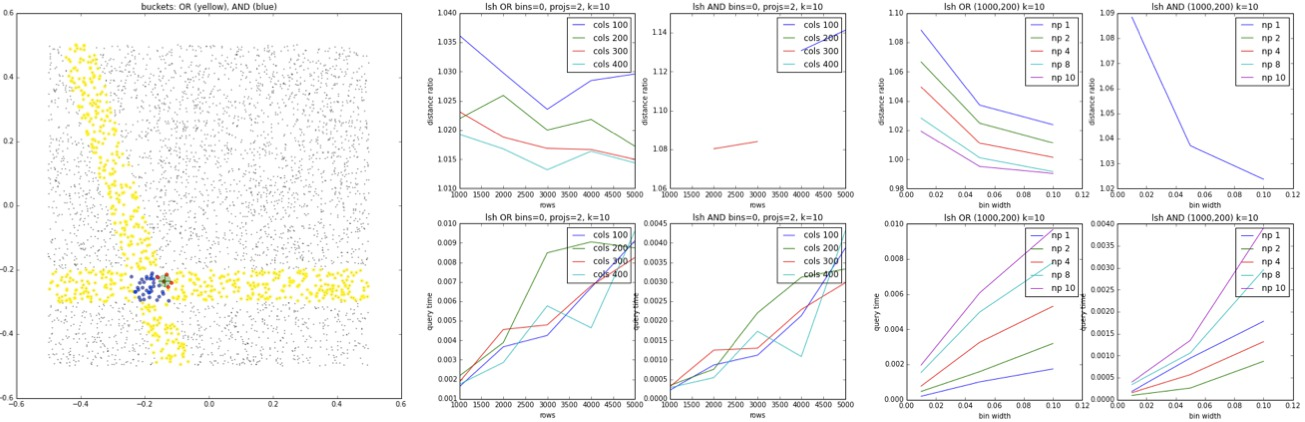

In [232]:
from IPython.display import Image
Image(filename='imgs/lsh.jpg') 

**1. Visualiza las proyecciones y los candidatos para el método AND y OR en el caso 2D**

¿Qué sucede cuando aumentas el número de proyecciones y el tamaño del bin? ¿Qué diferencia hay en el comportamiento del AND y del OR?


In [ ]:
%matplotlib inline
%run -i code/lsh.py

nb_projections = 2
bin_width      = 0.1

data  = np.random.random(size=(4000,2))-0.5
d_lsh = DiscretizedLSH(data, nb_projections, bin_width)
query = (np.random.random(size=(2))-0.5)*.5
show_2D_discretized_lsh(d_lsh, query, 5)

** 2. Mide el rendimiento en términos de _distance ratio_ de los resultados obtenidos y el tiempo para obtenerlos según aumenta el número de datos (filas) y la dimensionalidad de los mismos (columnas)**

In [ ]:
%matplotlib inline
%run -i code/lsh.py
plot_lsh_performance_for_datasizes (row_list=[1000,2000,3000,4000,5000], col_list=[100,200,300,400], 
                                    k_neighbours=10, bin_width=0.06, projs=2)

** 3. Mide el rendimiento en función del número de proyecciones y el ancho del bin**

In [ ]:
%matplotlib inline
%run -i code/lsh.py
plot_lsh_performance_for_bins_projs(n_samples=1000, len_x=200, k_neighbours=10,
                                    bins_list = [0.01,0.05,0.1],  projs_list = [1,2,4,8,10])

### Ejercicio 5: Separabilidad arbitraria en familia LSH

Para una familia de funciones LSH $\mathcal{F}(d_1, d_2, P_1, P_2)$ la siguiente función calcula los $P_1$ y $P_2$ obtenidos después de una sucesión de operaciones AND y OR entre funciones de dicha familia.

In [233]:
def compute_ops (p1, p2, ops):
    r1, r2 = p1, p2
    for op in ops:
        if op=="AND":
            r1, r2 = r1**2, r2**2
        elif op=="OR":
            r1, r2 = (1-(1-r1)**2), (1-(1-r2)**2)
    return r1,r2

print compute_ops(0.14,0.13,["AND", "OR"])
print compute_ops(0.14,0.13,['OR', 'OR', 'OR', 'AND', 'OR', 'AND'])


(0.038815839999999935, 0.033514390000000005)
(0.5491050439530768, 0.4885001048715914)


Completa la función `get_op_sequence` para que, dados $P_1$ y $P_2$ iniciales calcule una secuencia de operaciones AND y OR necesarias para que $P_1-P_2>separability$. Fíjate que para cada valor del par $P_1$, $P_2$ siempre puedes escoger una operación de modo que la diferencia entre ellos aumente.

**Ejecución esperada**

    > ops = get_op_sequence(0.14,0.13,0.9)
    > print ops
    ['OR', 'OR', 'OR', 'AND', 'OR', 'AND', 'AND', 'OR', 'OR', 'AND', 'AND', 'OR', 'OR', 'AND', 'OR', 'AND', 'AND', 'OR', 'AND', 'OR', 'OR', 'AND']

    > print compute_ops(0.14,0.13,ops)
    (0.983605980137414, 0.01658631278446673
    
    > ops = get_op_sequence(0.5,0.1,0.9)
    > print ops
    ['OR', 'OR', 'AND', 'OR', 'AND']
    
    > print compute_ops(0.5,0.1,ops)
    (0.9708876314107329, 0.049527294968337104)
    
    > ops = get_op_sequence(0.5,0.33,0.8)
    > print ops
    
    > ['OR', 'AND', 'OR', 'AND', 'OR', 'AND', 'OR', 'AND', 'AND', 'OR']
    > print compute_ops(0.5,0.1,ops)
    > (0.9646108475460486, 3.3306690738754696e-15)


In [ ]:
import numpy as np

def get_op_sequence(p1,p2,separability):
    # TU CODIGO AQUI
    ops = []
    return ops


Comprueba tu código

In [ ]:
ops = get_op_sequence(0.5,0.33,0.8)
print ops
print compute_ops(0.5,0.1,ops)